In [22]:
# 1. Seleccionar 2 imagenes
# 2. Agregar ruido de sal y pimienta o alguna otra anomalia
# 3. Selecciona dos tecnicas para eliminar el ruido o la anomalida
# Una con desarrollo propio, la otra con OpenCV
# 4. Realizar pruebas con las 2 tecnicas
# 5. Identifica una medida de desempe;o cuantitativa que permita seleccionar
# la mejor imagen con los mejores parametros (utilizar la img original)
# 6. Comparar y concluir
# !pip install opencv-python
# !pip install matplotlib
# !pip install numpy


In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [19]:
def imshow(title="Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [58]:
img01 = cv2.imread("gta6.jpg", cv2.IMREAD_GRAYSCALE)
img01

array([[128, 128, 128, ..., 133, 130, 130],
       [128, 128, 128, ..., 132, 129, 129],
       [128, 128, 128, ..., 132, 130, 129],
       ...,
       [ 31,  30,  28, ..., 144, 144, 144],
       [ 29,  28,  27, ..., 144, 144, 144],
       [ 29,  28,  27, ..., 144, 144, 144]], dtype=uint8)

In [59]:
# Agregando imagen a ruido

def agregar_ruido_aleatorio(image_ref = None, probabilidad = 0.00):
    
    # Obtener alto y ancho
    h,w = image_ref.shape

    # Crea un arreglo de ceros con el alto y ancho
    img_a_llenar = np.zeros((h,w), np.uint8)
    
    for j in range(h):
        for i in range(w):
            if(random.randint(0,int(100 - (probabilidad * 100))) == 1):
                # Agrega en la posicion del pixel un arreglo aleatorio
                img_a_llenar[j,i] = random.randint(0,255)
            else:
                # Agrega en el pixel el valor de la img original
                img_a_llenar[j,i]=img01[j,i]     
                
    # Nueva img02
    imshow("agregar_ruido_aleatorio", img_a_llenar)
    
    return img_a_llenar
    


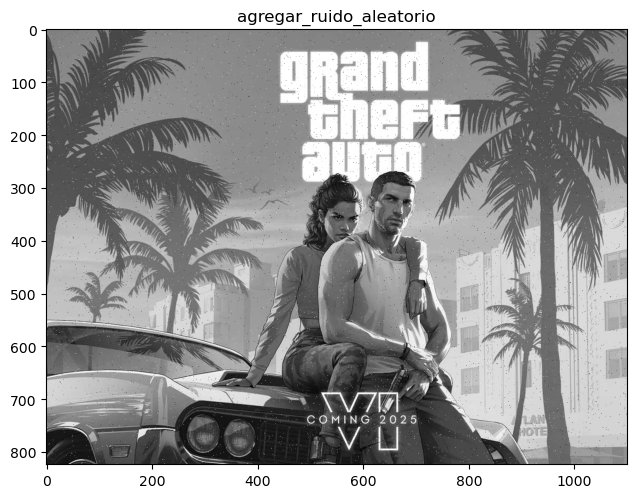

array([[128, 128, 128, ..., 133, 130, 130],
       [128, 128, 128, ..., 132, 129, 129],
       [128, 128, 128, ..., 132, 130, 129],
       ...,
       [ 31,  30,  28, ..., 144, 144, 144],
       [ 29,  28,  27, ..., 144, 144, 144],
       [ 29,  28,  27, ..., 144, 144, 144]], dtype=uint8)

In [60]:
agregar_ruido_aleatorio(img01, 0.10)

In [25]:
def agregarRuidoFunClase(image = None, probabilidad = 0.00):
    
    # Crear una matriz
    ruido =  np.zeros_like(image)
    
    # Generar valores de ruido
    cv2.randu(ruido, 0, 255)
    
    # Copia de la imagen como parametro
    img_con_ruido = image.copy()
    
    # Agregando ruido de la imagen
    img_con_ruido[ruido < int(255 * probabilidad / 2)] = 0
    img_con_ruido[ruido > 255 - int(255 * probabilidad / 2)] = 2
    
    # Mostrar resultado
    imshow("IMG RUIDO CON CODIGO DE CLASE", img_con_ruido)
    
    return img_con_ruido
    
    

In [26]:
def agregar_ruido_2(image = None, probabilidad = 0.00):
    
    # Copia de imagen
    img_con_ruido = np.copy(image)
    
    # Generar mascaras con 
    mascara_negra = np.random.rand(*image.shape[:2]) < probabilidad / 2
    img_con_ruido[mascara_negra] = 255
    
    mascara_blanca = np.random.rand(*image.shape[:2]) < probabilidad / 2
    img_con_ruido[mascara_blanca] = 0
    
    
    # Mostrar resultado
    imshow("agregar_ruido_2", img_con_ruido)
    
    return img_con_ruido

    

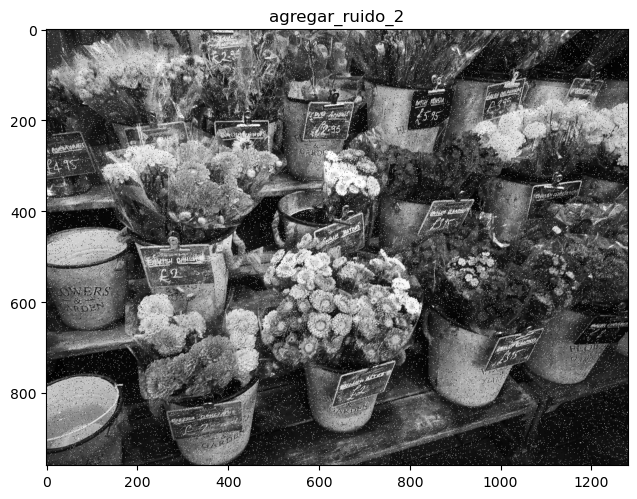

In [27]:
generar_img_con_ruido_open_cv = agregar_ruido_2(img01, 0.05)

In [28]:
# blur = cv2.GaussianBlur(img01, (5,5), 0)
# imshow("BLUR", blur)
# DOC https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

In [29]:
## Intentar reducir una imagen
h,w = img01.shape
factor_reduccion = 10

In [30]:
img_to_reduce = np.zeros((int(h/factor_reduccion), int(w/factor_reduccion)), np.uint8)

In [31]:
img_to_reduce.shape
print(f"Total Pixeles: { int(img_to_reduce.shape[0]) * int(img_to_reduce.shape[1])  }")

Total Pixeles: 12288


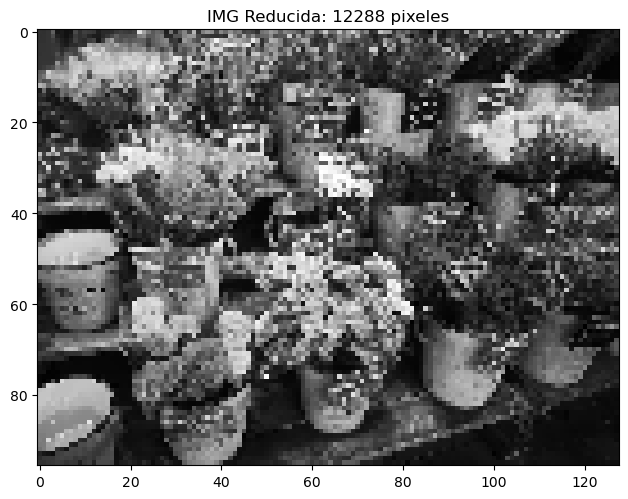

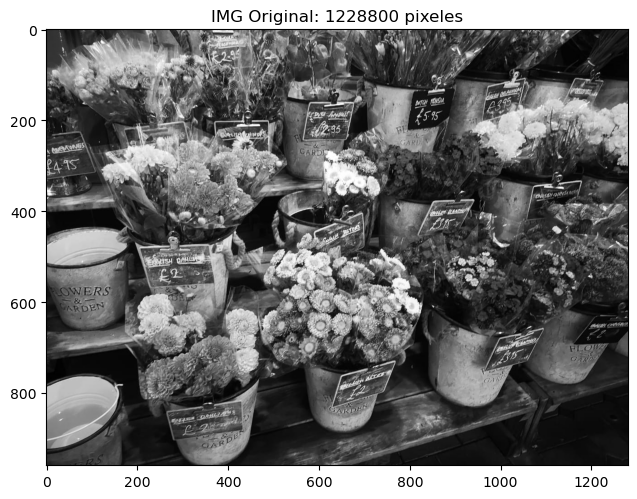

In [32]:
for j in range(h):
    for i in range(w):
        if((j < int(h/factor_reduccion)) and (i < int(w/factor_reduccion))):
           img_to_reduce[j,i] = img01[j * factor_reduccion, i * factor_reduccion]
        else:
            break
                    
imshow(f"IMG Reducida: { int(img_to_reduce.shape[0]) * int(img_to_reduce.shape[1])  } pixeles", img_to_reduce) 
imshow(f"IMG Original: { int(img01.shape[0]) * int(img01.shape[1])  } pixeles", img01) 

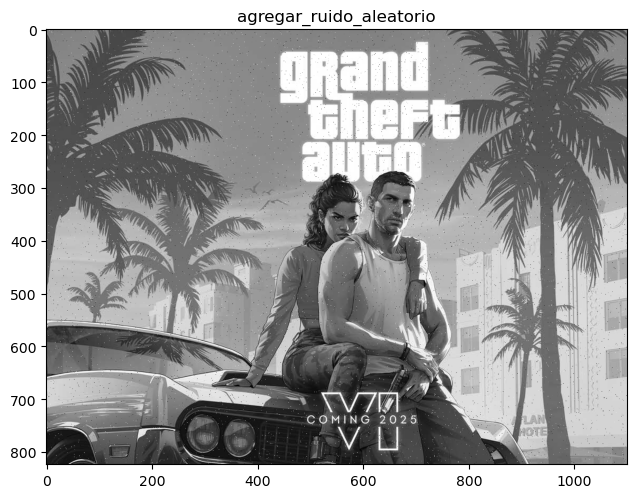

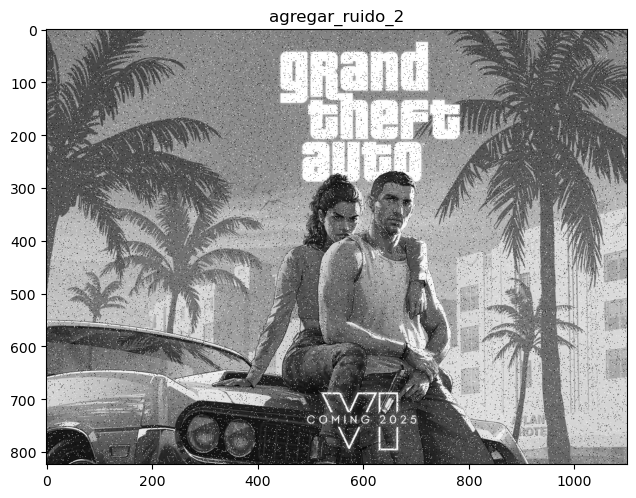

In [61]:
## Imagenes con ruido
imgRuido1 = agregar_ruido_aleatorio(img01, 0.10)
imgRuido2 = agregar_ruido_2(img01, 0.05)

In [65]:
# Muestra las imágenes original y procesada
def show_two_images(img1 = None, title1= "", img2 = None, title2 = ""):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.show()


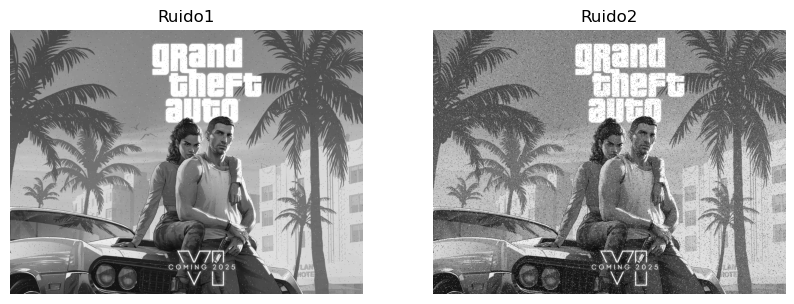

In [66]:
# Mostrar las imagenes con ruido
show_two_images(imgRuido1, "Ruido1", imgRuido2, "Ruido2")

In [ ]:
# Tenica para eliminar ruido manual

In [154]:
# Tecnica OPENCV
#https://www.academia.edu/42756944/M%C3%89TODOS_DE_SUAVIZADO_Y_REDUCCI%C3%93N_DE_RUIDO_EN_IM%C3%81GENES_DIGITALES_EN_PYTHON_CON_opencv_

def eliminar_anomalias_open_cv_medianBlur():
    
    # Aplicamos el filtro medianBlur()
    sin_ruido = cv2.medianBlur(imgRuido2, 3)
    
    show_two_images(imgRuido2, "IMG Con Ruido 2", sin_ruido, "Sin Ruido")
    

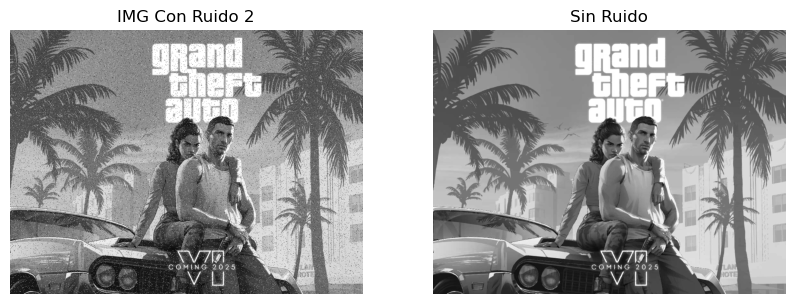

In [155]:
eliminar_anomalias_open_cv_medianBlur()

SyntaxError: invalid syntax (1885169875.py, line 1)

In [160]:
def eliminar_anomalias_open_cv(convolution_method = "2DConvolution" ):
    
    # Aplicamos el filtro medianBlur()
    sin_ruido = None
    
    if (convolution_method == "2DConvolution"):
        kernelConv = np.ones((3,3), np.float32)/25
        dst = cv2.filter2D(imgRuido2, -1, kernelConv)
        sin_ruido = dst
        
    # sin_ruido = cv2.medianBlur(imgRuido2, 3)
    
    show_two_images(imgRuido2, "IMG Con Ruido 2", sin_ruido, "Sin Ruido")

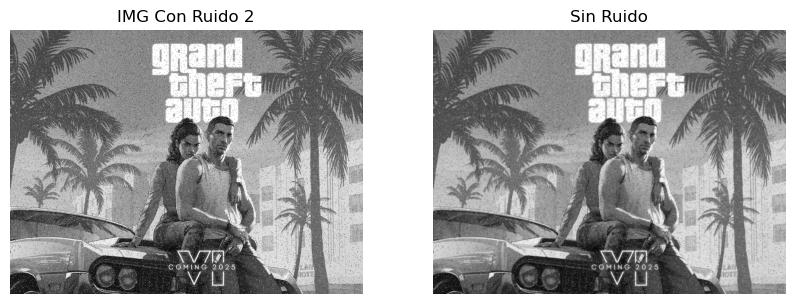

In [161]:
eliminar_anomalias_open_cv("2DConvolution")